In [56]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os 

In [52]:
folder = "D:\Tinu Project\Projects Files Excel\OneDrive_1_27-8-2024"
file1 = "mnist_train.csv"
file2 = "mnist_test.csv"
data1 = os.path.join(folder,file1)
data2 = os.path.join(folder,file2)

np.random.seed(42)

In [75]:
train_df = pd.read_csv(data1)
test_df = pd.read_csv(data2)

In [76]:
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

X_train = X_train / 255.0
X_test = X_test / 255.0

print(f'Shape of minst_train_data: {mnist_train_data.shape}')
print(f'Shape of minst_test_data: {mnist_test_data.shape}')


Shape of minst_train_data: (60000,)
Shape of minst_test_data: (10000,)


In [77]:
n_inputs = 784
n_hidden = 256
n_outputs = 10

weights1 = np.random.rand(n_inputs, n_hidden)
weights2 = np.random.rand(n_hidden, n_outputs)
bias1 = np.zeros((1, n_hidden))
bias2 = np.zeros((1, n_outputs))

In [78]:
y_train_onehot = np.zeros((y_train.shape[0], n_outputs))
y_train_onehot[np.arange(y_train.shape[0]), y_train] = 1

y_test_onehot = np.zeros((y_test.shape[0], n_outputs))
y_test_onehot[np.arange(y_test.shape[0]), y_test] = 1

In [79]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [84]:
for epoch in range(10):
    # Forward pass
    hidden_layer = sigmoid(np.dot(X_train, weights1) + bias1)
    outputs = sigmoid(np.dot(hidden_layer, weights2) + bias2)

# Train the model
for epoch in range(10):
    # Forward pass
    hidden_layer = sigmoid(np.dot(X_train, weights1) + bias1)
    outputs = sigmoid(np.dot(hidden_layer, weights2) + bias2)
    
    # Compute the loss
    loss = np.mean((y_train_onehot - outputs) ** 2)
    
    # Backward pass
    output_error = y_train_onehot - outputs
    output_delta = output_error * sigmoid_derivative(outputs)
    
    hidden_error = output_delta.dot(weights2.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_layer)
    
    # Update the weights and biases
    weights2 += 0.01 * hidden_layer.T.dot(output_delta)
    weights1 += 0.01 * X_train.T.dot(hidden_delta)
    bias2 += 0.01 * np.sum(output_delta, axis=0, keepdims=True)
    bias1 += 0.01 * np.sum(hidden_delta, axis=0, keepdims=True)
    print('Epoch {}: Loss = {:.4f}'.format(epoch+1, loss))

Epoch 1: Loss = 0.9000
Epoch 2: Loss = 0.9000
Epoch 3: Loss = 0.9000
Epoch 4: Loss = 0.9000
Epoch 5: Loss = 0.9000
Epoch 6: Loss = 0.9000
Epoch 7: Loss = 0.9000
Epoch 8: Loss = 0.9000
Epoch 9: Loss = 0.9000
Epoch 10: Loss = 0.9000


Test Accuracy: 9.80%


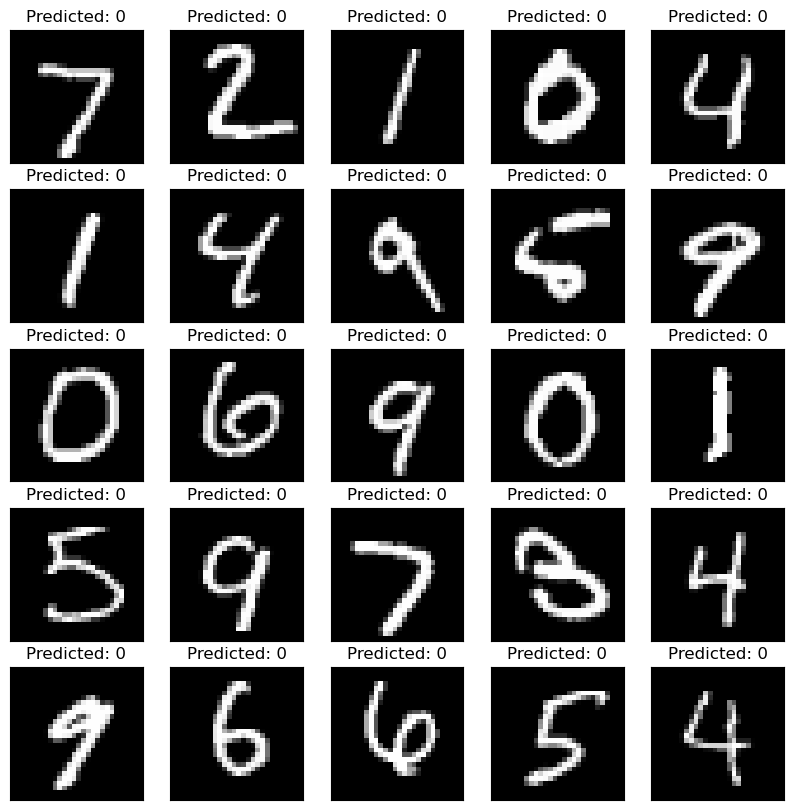

In [86]:
# Evaluate the model on the test data
hidden_layer = sigmoid(np.dot(X_test, weights1) + bias1)
outputs = sigmoid(np.dot(hidden_layer, weights2) + bias2)

# Compute the accuracy
accuracy = np.mean(np.argmax(outputs, axis=1) == y_test)
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))

#**Visualize Some Predictions (Optional)**

# Visualize some predictions
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title('Predicted: {}'.format(np.argmax(outputs[i])))
    plt.xticks([])
    plt.yticks([])
plt.show()